In [1]:
# Importing Required Packages 
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 
from PIL import Image

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

from nltk.corpus import stopwords
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [2]:
# Reading the required data into jupyter notebook 
train = pd.read_csv('C:/Users/Anish/Downloads/Data/train.csv')
test = pd.read_csv('C:/Users/Anish/Downloads/Data/test.csv')



In [3]:
#y = train.target

In [4]:
#lINK TO UPLOAD FILES ON GOOGLE COLLAB 
#THIS IS A ONLINE PLATFORM WHERE WE COULD EXECUTE PYTHON CODE

#from google.colab import files
#uploaded = files.upload()

In [5]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
# READING A COMMENT
train['comment_text'][16]

"Bye! \n\nDon't look, come or think of comming back! Tosser."

In [8]:
#lens = train.comment_text.str.len()
#lens.mean(), lens.std(), lens.max()

In [9]:
# check missing values in numeric columns
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [11]:
#comments which are not labbeled in any of the six categories
unlabel = train[(train['toxic']!=1) & (train['severe_toxic']!=1) & (train['obscene']!=1) & (train['threat']!=1)
                 &(train['insult']!=1) & (train['identity_hate']!=1)]

per = len(unlabel) / len(train) * 100 
print(per)

z= len(unlabel)
print(z)
label = train.comment_text.count() - z
label

89.83211235124176
143346


16225

In [12]:
#CALCULATING PERCENTAGE OF CLEAN DATA
percentage_unlabel = len(unlabel) / len(train) * 100
percentage_unlabel

89.83211235124176

In [13]:
#check for missing values 
a = train[train['toxic'].isnull()]
a
b = train[train['severe_toxic'].isnull()]
b
c = train[train['obscene'].isnull()]
c
d = train[train['threat'].isnull()]
d
e = train[train['insult'].isnull()]
e
f = train[train['identity_hate'].isnull()]
f

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [14]:
#Total number of rows in TRAIN data
len(train)

159571

In [15]:
#Total number of rows in TEST data
len(test)

153164

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [17]:
#check null value in TRAIN comments column
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)

#check null value in TEST comments column
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)

#Fill NA with blank
COMMENT = 'comment_text'
a=train[COMMENT].fillna("unknown", inplace=True)
print(a)
b=test[COMMENT].fillna("unknown", inplace=True)
print(b)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64
None
None


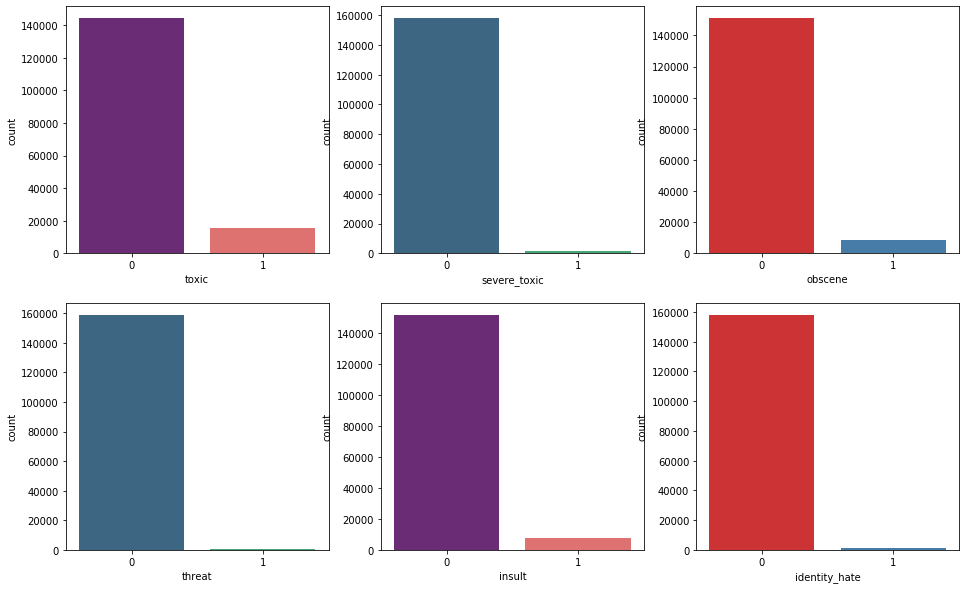

In [18]:
# EXPLORING PREDEFINED LABELS
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train['toxic'],palette= 'magma',ax=ax1)
sns.countplot(train['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(train['obscene'], palette= 'Set1',ax=ax3)
sns.countplot(train['threat'], palette= 'viridis',ax = ax4)
sns.countplot(train['insult'], palette = 'magma',ax=ax5)
sns.countplot(train['identity_hate'], palette = 'Set1', ax = ax6)

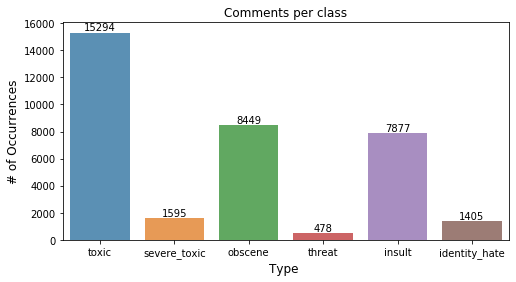

In [19]:
#EXPLORING AND CALCULATING COMMENTS PER CLASS
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Comments per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64


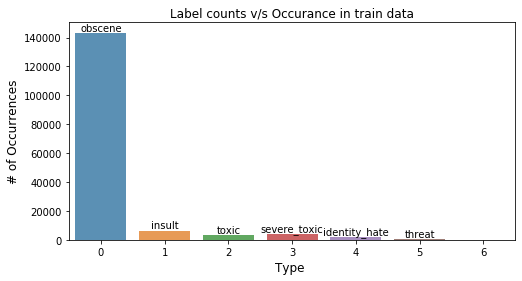

In [20]:
#CLEAN AND UNCLEAN DATA
train_copy = train.copy()
y = train[cols_target].sum(axis=1)
x=y.value_counts()
print(x)
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Label counts v/s Occurance in train data")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = cols_target
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


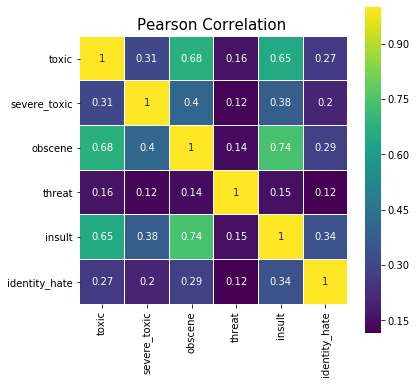

In [22]:
# CHECKING CORELATION BETWEEEN LABELS
colormap = plt.cm.viridis
plt.figure(figsize=(6,6))
plt.title('Pearson Correlation ', y=1, size=15)
sns.heatmap(train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].astype(float).corr(),linewidths=0.1,
            vmax=1.0, square=True, cmap=colormap, linecolor='white',
            annot=True)

In [23]:
# CALCULATING TOTAL LENGTH OF INDIVIDUAL COMMENTS
train['total_length'] = train['comment_text'].apply(len)
train['total_length']

0          264
1          112
2          233
3          622
4           67
5           65
6           44
7          115
8          472
9           70
10        2875
11          56
12         319
13         819
14         219
15         610
16          57
17          48
18         118
19         440
20         266
21          58
22         543
23          97
24        1409
25         172
26         288
27         343
28         119
29          78
          ... 
159541     346
159542     164
159543      80
159544      19
159545     105
159546     534
159547      30
159548      27
159549      25
159550     173
159551     196
159552      92
159553     888
159554     182
159555     119
159556      57
159557     429
159558     134
159559     357
159560    1889
159561    1147
159562    1015
159563     394
159564     369
159565     653
159566     295
159567      99
159568      81
159569     116
159570     189
Name: total_length, Length: 159571, dtype: int64

In [24]:
# EXPLORING LENGTH OF EACH COMMENT
comment_length = train['comment_text'].str.len()
comment_length.describe()


count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64

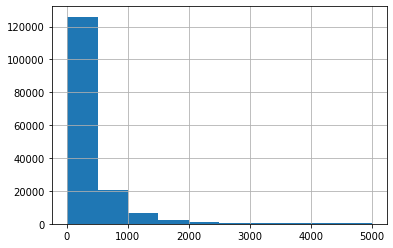

In [25]:
comment_length.hist()
#Comments have no null values.
#Mininum length of a comment is only 0 chars while maximum length can be 5000 characters.
#Mean (260 chars) and median (133 chars) are not close indicating the skewness - as a result histogram is left sided

In [26]:
# exploring capital letter in the data
train['capitals'] = train['comment_text'].apply(lambda comment:sum(1 for c in comment if c.isupper()))
train['capitals']

0         17
1          8
2          4
3         11
4          2
5          1
6         37
7          4
8          7
9          2
10        53
11         0
12        43
13         6
14         8
15        28
16         3
17        13
18         5
19         5
20        15
21         4
22        20
23         7
24        47
25         6
26         5
27        12
28         6
29         5
          ..
159541     7
159542     0
159543     0
159544     1
159545     8
159546    20
159547     1
159548     2
159549     4
159550     2
159551     7
159552     5
159553    22
159554     0
159555     7
159556     4
159557     8
159558     4
159559     8
159560    52
159561    19
159562    18
159563    20
159564    10
159565     5
159566     2
159567     2
159568     4
159569     2
159570     4
Name: capitals, Length: 159571, dtype: int64

In [27]:
# Calculating number of exclamation used in each comments
train['exclamation'] = train['comment_text'].apply(lambda comment: comment.count('!'))
train['exclamation']

0          0
1          1
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         2
17         0
18         0
19         0
20         0
21         0
22         2
23         0
24         0
25         0
26         0
27         0
28         0
29         1
          ..
159541     0
159542     0
159543     0
159544     0
159545     0
159546    17
159547     0
159548     0
159549     0
159550     0
159551     0
159552     0
159553     0
159554     0
159555     0
159556     0
159557     0
159558     0
159559     0
159560     0
159561     0
159562     0
159563     0
159564     0
159565     0
159566     0
159567     0
159568     0
159569     0
159570     0
Name: exclamation, Length: 159571, dtype: int64

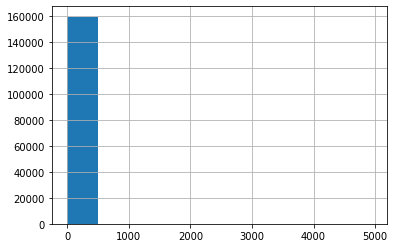

In [28]:
train['exclamation'].hist()

In [29]:
# counting number of question marks used
train['Question'] = train['comment_text'].apply(lambda comment : comment.count('?'))
train['Question']

0         1
1         0
2         0
3         0
4         1
5         0
6         0
7         0
8         1
9         0
10        0
11        1
12        1
13        0
14        0
15        2
16        0
17        0
18        1
19        1
20        0
21        0
22        0
23        0
24        4
25        0
26        0
27        0
28        1
29        0
         ..
159541    0
159542    1
159543    0
159544    0
159545    2
159546    0
159547    0
159548    0
159549    0
159550    0
159551    0
159552    0
159553    0
159554    0
159555    1
159556    0
159557    0
159558    0
159559    0
159560    0
159561    0
159562    0
159563    0
159564    0
159565    0
159566    2
159567    0
159568    0
159569    0
159570    0
Name: Question, Length: 159571, dtype: int64

In [30]:
#calculating smiles used in given text
train['smilies'] = train['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))
train['smilies']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
159541    0
159542    0
159543    0
159544    0
159545    0
159546    0
159547    0
159548    0
159549    0
159550    0
159551    0
159552    0
159553    0
159554    0
159555    0
159556    0
159557    0
159558    0
159559    0
159560    0
159561    0
159562    0
159563    0
159564    0
159565    0
159566    0
159567    0
159568    0
159569    0
159570    0
Name: smilies, Length: 159571, dtype: int64

In [31]:
#calculating if any used of digits in the text
train['num_words'] = train['comment_text'].apply(lambda comment: len(comment.split()))
train['num_words']

0          43
1          17
2          42
3         113
4          13
5          13
6           8
7          20
8          83
9          12
10        494
11         11
12         53
13        142
14         39
15        118
16         10
17          5
18         21
19         81
20         42
21         11
22         82
23         14
24        228
25         23
26         49
27         60
28         29
29         16
         ... 
159541     58
159542     30
159543     13
159544      4
159545     18
159546    103
159547      6
159548      4
159549      5
159550     33
159551     30
159552     15
159553    156
159554     35
159555     23
159556     12
159557     81
159558     21
159559     57
159560    314
159561    222
159562    170
159563     69
159564     63
159565    112
159566     47
159567     18
159568     12
159569     25
159570     36
Name: num_words, Length: 159571, dtype: int64

In [32]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_length,capitals,exclamation,Question,smilies,num_words
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,0,1,0,43
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,1,0,0,17
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,0,0,0,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,0,0,0,113
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,0,1,0,13


In [33]:
# checking of corellation with the existing feature of the data
features = ('total_length', 'capitals','exclamation','Question', 'smilies', 'num_words')
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')

rows = [{c:train[f].corr(train[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)
df_correlations

,identity_hate,insult,obscene,severe_toxic,threat,toxic
total_length,-0.013647,-0.045052,-0.042945,0.010131,-0.008011,-0.054470
capitals,0.053576,0.075945,0.081691,0.143410,0.033581,0.091175
exclamation,0.006005,0.027010,0.024362,0.060578,0.034202,0.037337
Question,-0.000516,0.004859,0.005404,-0.004541,-0.003949,0.027820
smilies,0.001206,-0.004066,-0.003254,-0.002564,-0.001524,-0.003833
num_words,-0.014493,-0.043642,-0.042207,0.008452,-0.006688,-0.052444


In [34]:
#Remove \n from the given text
train['comment_text'] = train['comment_text'].map(lambda x: re.sub('\\n',' ',str(x)))
test['comment_text'] = test['comment_text'].map(lambda x: re.sub('\\n',' ',str(x)))



In [35]:
#Remove IP address 
train['comment_text'] = train['comment_text'].map(lambda x : re.sub('\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}','',str(x)))
test['comment_text'] = test['comment_text'].map(lambda x : re.sub('\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}','',str(x)))

In [36]:
# Remove http links in the text
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))
test['comment_text'] = test['comment_text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))    
# Remove all punctuation except for apostrophe (')
train['comment_text'] = train['comment_text'].map(lambda x: re.sub('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','',str(x)))
test['comment_text'] = test['comment_text'].map(lambda x: re.sub('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','',str(x)))

In [37]:
train['num_words'].max()
train['num_words'].min()

1

In [38]:
# Stop word removal in TRAIN
#nltk.download('stopwords')
stop = stopwords.words('english')
train['comment_text'] = train['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['comment_text'][0]

"Explanation Why edits made username Hardcore Metallica Fan reverted They vandalisms closure GAs I voted New York Dolls FAC And please remove template talk page since I'm retired"

In [39]:
# Stop word removal in TEST
test['comment_text'] = test['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['comment_text'][0]

'Yo bitch Ja Rule succesful ever whats hating sad mofuckasi bitch slap ur pethedic white faces get kiss ass guys sicken Ja rule pride da music man dont diss shit nothin wrong bein like tupac brother toofuckin white boys get things right next time'

In [40]:
#SPlit different words
train['comment_text']=train['comment_text'].apply(lambda tweet: re.sub(r'([a-z])([A-Z])',r'\1 \2',tweet))
test['comment_text']=test['comment_text'].apply(lambda tweet: re.sub(r'([a-z])([A-Z])',r'\1 \2',tweet))

In [41]:
train['comment_text'][134566]

'Went several hours ago sorry Gazaflotillaclash'

In [42]:
#Data Cleaning
def abc(x,y):
    x[y] = x[y].str.replace(r"http\S+","")
    x[y] = x[y].str.replace(r"http","")
    x[y] = x[y].str.replace(r"@\S+", "")
    x[y] = x[y].str.replace(r'[^A-Za-z0-9(),!?@\'\`\"\_\n]',' ')
    x[y] = x[y].str.replace(r"@", "at")
    x[y] = x[y].str.replace(r"\n"," ")
    x[y] = x[y].str.lower()
    return x 



In [43]:
#cleaning of func(abc) - Train
train = abc(train,'comment_text')
train["comment_text"][0]


"explanation why edits made username hardcore metallica fan reverted they vandalisms closure gas i voted new york dolls fac and please remove template talk page since i'm retired"

In [44]:
# cleaning test data func(abc)
test = abc(test,'comment_text')
test["comment_text"][0]

'yo bitch ja rule succesful ever whats hating sad mofuckasi bitch slap ur pethedic white faces get kiss ass guys sicken ja rule pride da music man dont diss shit nothin wrong bein like tupac brother toofuckin white boys get things right next time'

In [45]:
# function for text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('\d+', '',text)
    text = re.sub('_','',text)
    text = text.strip(' ')
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    return text

In [46]:
# cleaning test and train data using func(clean_text)
train['comment_text'] = train['comment_text'].map(lambda com : clean_text(com))
test['comment_text'] = test['comment_text'].map(lambda com : clean_text(com))

In [47]:
# train.to_csv("traincleandata.csv")
train['comment_text'][16]

'bye do not look come think comming back tosser'

In [48]:
#Common word removal
#freq = pd.Series(' '.join(train['comment_text']).split()).value_counts()[:10]
#freq


In [49]:
#Rare word removal
#freq_rare = pd.Series(' '.join(train['comment_text']).split()).value_counts()[-10:]
#freq_rare

In [50]:
#pip install TextBlob

In [51]:
#Spelling correction
#from textblob import TextBlob
#train['comment_text'] = train['comment_text'].apply(lambda x: str(TextBlob(x).correct()))

In [52]:
#train['comment_text'][2]

In [53]:
#TextBlob(train['comment_text'][1]).words

In [54]:
#from nltk.tokenize import RegexpTokenizer
#tokenizer = RegexpTokenizer(r'\w+')
#train["tokens"] = train["comment_text"].apply(tokenizer.tokenize)

In [55]:
#from textblob import Word
#train['lemme'] = train['comment_text'][:5].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#train['comment_text'].head()

In [56]:
#Stemming the data TRAIN AND TEST BOTH
st = SnowballStemmer('english')
train['stemmer'] = train['comment_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
test['stemmer'] = test['comment_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [57]:
train['stemmer'][16]

'bye do not look come think com back tosser'

In [58]:
# creating new train and test file
#train.to_csv("C:/Users/Anish/Downloads/Data/traincleandata.csv")
#test.to_csv("C:/Users/Anish/Downloads/Data/testcleandata.csv")

In [ ]:
#Sequence padding
#maxlen = 150
#tokenizer = Tokenizer(num_words=max_features)
#tokenizer.fit_on_texts(list(rain))
#train = tokenizer.texts_to_sequences(train)
#test = tokenizer.texts_to_sequences(test)
#train_seq = pad_sequences(list_tokenized_train, maxlen=maxlen)
#test_seq= pad_sequences(list_tokenized_test, maxlen=maxlen)

In [59]:
#COnverting to BOW and then to TF_IDF
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer

#vectorizer = CountVectorizer(max_features=2000, min_df=5, max_df=0.7)
#X = vectorizer.fit_transform(train['stemmer']).toarray()

#tfidfconverter = TfidfTransformer()
#X = tfidfconverter.fit_transform(X).toarray()

#y = train.iloc[:,2:8]
#y = train.toxic

In [60]:
#Directly converting into TF-IDF scores
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)
#X = tfidfconverter.fit_transform(train['stemmer'])

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train.shape, y_train.shape , X_test.shape, y_test.shape,y_train_new

In [61]:
# importing required packages 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, multilabel_confusion_matrix, classification_report

#Spliting data using 80:20 holdout into train and test. 
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train, test = train_test_split(train, random_state=42, test_size=0.2 ,shuffle=True)
X_train = train.stemmer
X_test = test.stemmer
print(X_train.shape)
print(X_test.shape)

(127656,)
(31915,)


In [59]:
# Calculating train_features, test_feature ,train_labels and test_labels
test_labels = pd.read_csv('C:/Users/Anish/Downloads/Data/test_labels.csv')
submission = pd.read_csv('C:/Users/Anish/Downloads/Data/sample_submission.csv')
test = test[test_labels['toxic'] != -1]
test_labels = test_labels[test_labels['toxic'] != -1]
test_features = test.stemmer
train_features = train.stemmer
print('test labels', test_labels.head(10))
train_labels = train.drop(['id', 'comment_text','total_length', 'capitals','exclamation','Question', 'smilies', 'num_words','stemmer'], axis = 1)
test_labels = test_labels.drop(['id'], axis = 1)
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


test labels                   id  toxic  severe_toxic  obscene  threat  insult  \
5   0001ea8717f6de06      0             0        0       0       0   
7   000247e83dcc1211      0             0        0       0       0   
11  0002f87b16116a7f      0             0        0       0       0   
13  0003e1cccfd5a40a      0             0        0       0       0   
14  00059ace3e3e9a53      0             0        0       0       0   
16  000663aff0fffc80      0             0        0       0       0   
17  000689dd34e20979      0             0        0       0       0   
19  000844b52dee5f3f      0             0        0       0       0   
21  00091c35fa9d0465      1             0        0       0       0   
22  000968ce11f5ee34      0             0        0       0       0   

    identity_hate  
5               0  
7               0  
11              0  
13              0  
14              0  
16              0  
17              0  
19              0  
21              0  
22              0

In [64]:
train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((159571,), (159571, 6), (63978,), (63978, 6))

In [64]:
# Creating the pipeline function for differnt classifiers
GBC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)),
                ('clf', OneVsRestClassifier(GradientBoostingClassifier(), n_jobs=1)),
            ])

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, use_idf ='TRUE')),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

LOG_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

DT_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)),
                ('clf', OneVsRestClassifier(DecisionTreeClassifier(), n_jobs=1)),
            ])

In [65]:
# function to plot ROC curve
def plot_roc_curve(test_features, predict_prob):
    fpr, tpr, thresholds = roc_curve(test_features, predict_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for toxic comments')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend(labels)

In [66]:
# function to calculate accuracy, confusion matrix ,roc and classification report
def run_pipeline(pipeline, train_feats, train_lbls, test_feats, test_lbls):
    pipeline.fit(train_feats, train_lbls)
    predictions = pipeline.predict(test_feats)
    pred_proba = pipeline.predict_proba(test_feats)
    print('roc_auc: ', roc_auc_score(test_lbls, pred_proba))
    print('accuracy: ',accuracy_score(test_lbls, predictions))
    print('confusion matrices:')
    print(multilabel_confusion_matrix(test_lbls, predictions))
    print('classification_report: ')
    print(classification_report(test_lbls, predictions))
    

In [67]:
# function for executing svm classifier
def run_SVM_pipeline(pipeline, train_feats, train_lbls, test_feats, test_lbls):
    pipeline.fit(train_feats, train_labels)
    predictions = pipeline.predict(test_feats)
    print('accuracy: ', accuracy_score(test_lbls, predictions))
    print('confusion matrices:')
    print(multilabel_confusion_matrix(test_lbls, predictions))
    print('classification_report: ')
    print(classification_report(test_lbls, predictions))

In [68]:
# ploting roc curve using pipeline
def plot_pipeline_roc_curve(pipeline, train_feats, train_lbls, test_feats, test_lbls):
    for label in labels:
        pipeline.fit(train_feats, train[labels])
        pred_proba = pipeline.predict_proba(test_feats)[:,1]
        plot_roc_curve(test_lbls[label], pred_proba)

In [68]:
#Gradiant Boosting Algorithm
run_pipeline(GBC_pipeline, train_features, train_labels, test_features, test_labels)

roc_auc:  0.9212289990825863
accuracy:  0.8983244240207572
confusion matrices:
[[[56511  1377]
  [ 2954  3136]]

 [[63446   165]
  [  287    80]]

 [[59215  1072]
  [ 1472  2219]]

 [[63692    75]
  [  194    17]]

 [[59890   661]
  [ 1851  1576]]

 [[63146   120]
  [  486   226]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.69      0.51      0.59      6090
           1       0.33      0.22      0.26       367
           2       0.67      0.60      0.64      3691
           3       0.18      0.08      0.11       211
           4       0.70      0.46      0.56      3427
           5       0.65      0.32      0.43       712

   micro avg       0.68      0.50      0.58     14498
   macro avg       0.54      0.37      0.43     14498
weighted avg       0.67      0.50      0.57     14498
 samples avg       0.05      0.04      0.04     14498



C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


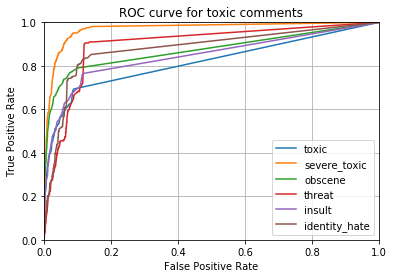

In [68]:
plot_pipeline_roc_curve(GBC_pipeline, train_features, train_labels, test_features, test_labels)

In [70]:
#Support Vector Machine
run_SVM_pipeline(SVC_pipeline, train_features, train_labels, test_features, test_labels)

accuracy:  0.888852418018694
confusion matrices:
[[[54904  2984]
  [ 1504  4586]]

 [[63469   142]
  [  271    96]]

 [[59184  1103]
  [ 1194  2497]]

 [[63678    89]
  [  156    55]]

 [[59684   867]
  [ 1468  1959]]

 [[63150   116]
  [  457   255]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.61      0.75      0.67      6090
           1       0.40      0.26      0.32       367
           2       0.69      0.68      0.68      3691
           3       0.38      0.26      0.31       211
           4       0.69      0.57      0.63      3427
           5       0.69      0.36      0.47       712

   micro avg       0.64      0.65      0.65     14498
   macro avg       0.58      0.48      0.51     14498
weighted avg       0.64      0.65      0.64     14498
 samples avg       0.07      0.06      0.06     14498



C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [ ]:
#plot_pipeline_roc_curve(SVC_pipeline, train_features, train_labels, test_features, test_labels)

In [71]:
#Logistic regression
run_pipeline(LOG_pipeline, train_features, train_labels, test_features, test_labels)

roc_auc:  0.9680558540159455
accuracy:  0.8920410140985964
confusion matrices:
[[[55243  2645]
  [ 1706  4384]]

 [[63393   218]
  [  248   119]]

 [[59418   869]
  [ 1277  2414]]

 [[63695    72]
  [  177    34]]

 [[59777   774]
  [ 1552  1875]]

 [[63158   108]
  [  476   236]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      6090
           1       0.35      0.32      0.34       367
           2       0.74      0.65      0.69      3691
           3       0.32      0.16      0.21       211
           4       0.71      0.55      0.62      3427
           5       0.69      0.33      0.45       712

   micro avg       0.66      0.63      0.64     14498
   macro avg       0.57      0.46      0.50     14498
weighted avg       0.66      0.63      0.64     14498
 samples avg       0.06      0.06      0.06     14498



C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


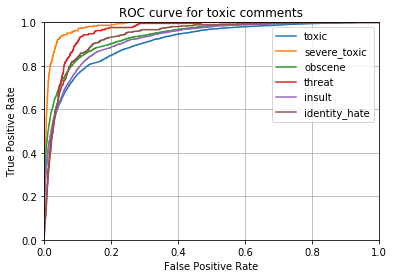

In [72]:
plot_pipeline_roc_curve(LOG_pipeline, train_features, train_labels, test_features, test_labels)

In [69]:
#Decision Tree
run_pipeline(DT_pipeline, train_features, train_labels, test_features, test_labels)

roc_auc:  0.742041396992081
accuracy:  0.8435868579824315
confusion matrices:
[[[53438  4450]
  [ 1628  4462]]

 [[63150   461]
  [  261   106]]

 [[57843  2444]
  [ 1161  2530]]

 [[63600   167]
  [  151    60]]

 [[58149  2402]
  [ 1386  2041]]

 [[62867   399]
  [  419   293]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.50      0.73      0.59      6090
           1       0.19      0.29      0.23       367
           2       0.51      0.69      0.58      3691
           3       0.26      0.28      0.27       211
           4       0.46      0.60      0.52      3427
           5       0.42      0.41      0.42       712

   micro avg       0.48      0.65      0.55     14498
   macro avg       0.39      0.50      0.44     14498
weighted avg       0.48      0.65      0.55     14498
 samples avg       0.06      0.06      0.06     14498



C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


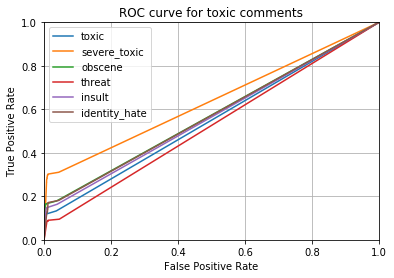

In [70]:
plot_pipeline_roc_curve(DT_pipeline, train_features, train_labels, test_features, test_labels)

In [62]:
# GRADIANT BOSSTING ALGORITHM
GBC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, use_idf ='TRUE')),
                ('clf', OneVsRestClassifier(GradientBoostingClassifier(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    GBC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = GBC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(balanced_accuracy_score(test[category], prediction)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(test[category], prediction)))
    print('roc_auc: ', roc_auc_score(test[category], prediction))
    print(classification_report(test[category], prediction))
   

... Processing toxic
Test accuracy is 0.7284626358088042
Confusion matrix [[[ 1406  1650]
  [   91 28768]]

 [[28768    91]
  [ 1650  1406]]]
roc_auc:  0.7284626358088042
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28859
           1       0.94      0.46      0.62      3056

    accuracy                           0.95     31915
   macro avg       0.94      0.73      0.79     31915
weighted avg       0.95      0.95      0.94     31915

... Processing severe_toxic
Test accuracy is 0.5752478338388711
Confusion matrix [[[   49   272]
  [   68 31526]]

 [[31526    68]
  [  272    49]]]
roc_auc:  0.5752478338388711
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.42      0.15      0.22       321

    accuracy                           0.99     31915
   macro avg       0.71      0.58      0.61     31915
weighted avg       0.99      0.99      0.99     3191

In [66]:
# GRADIANT BOSSTING ALGORITHM- HYPERPARAMETER TUNNING
GBC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7,ngram_range = (1,2), use_idf ='TRUE')),
                ('clf', OneVsRestClassifier(GradientBoostingClassifier(min_samples_split=500,
                                                                       min_samples_leaf=50,max_depth=8
                                                                       ,random_state=10), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    GBC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = GBC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(balanced_accuracy_score(test[category], prediction)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(test[category], prediction)))
    print('roc_auc: ', roc_auc_score(test[category], prediction))
    print(classification_report(test[category], prediction))

... Processing toxic
Test accuracy is 0.7820907800228916
Confusion matrix [[[ 1745  1311]
  [  197 28662]]

 [[28662   197]
  [ 1311  1745]]]
roc_auc:  0.7820907800228916
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     28859
           1       0.90      0.57      0.70      3056

    accuracy                           0.95     31915
   macro avg       0.93      0.78      0.84     31915
weighted avg       0.95      0.95      0.95     31915

... Processing severe_toxic
Test accuracy is 0.6096107013496983
Confusion matrix [[[   71   250]
  [   62 31532]]

 [[31532    62]
  [  250    71]]]
roc_auc:  0.6096107013496983
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.53      0.22      0.31       321

    accuracy                           0.99     31915
   macro avg       0.76      0.61      0.65     31915
weighted avg       0.99      0.99      0.99     3191

In [62]:
#lINEAR SUPPORT VECTOR
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, use_idf ='TRUE')),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(balanced_accuracy_score(test[category], prediction)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(test[category], prediction)))
    print('roc_auc: ', roc_auc_score(test[category], prediction))
    print(classification_report(test[category], prediction))

... Processing toxic
Test accuracy is 0.8206974606540666
Confusion matrix [[[ 1987  1069]
  [  254 28605]]

 [[28605   254]
  [ 1069  1987]]]
roc_auc:  0.8206974606540666
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.89      0.65      0.75      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.82      0.86     31915
weighted avg       0.96      0.96      0.96     31915

... Processing severe_toxic
Test accuracy is 0.6020757519912393
Confusion matrix [[[   66   255]
  [   46 31548]]

 [[31548    46]
  [  255    66]]]
roc_auc:  0.6020757519912393
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.59      0.21      0.30       321

    accuracy                           0.99     31915
   macro avg       0.79      0.60      0.65     31915
weighted avg       0.99      0.99      0.99     3191

In [66]:
#lINEAR SUPPORT VECTOR - HYPERPARAMETER TUNNING
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000,ngram_range = (1,2), min_df=5, max_df=0.7, use_idf ='TRUE')),
                ('clf', OneVsRestClassifier(LinearSVC(C=1000,random_state=10), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using XTRAIN & yTRAIN
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(balanced_accuracy_score(test[category], prediction)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(test[category], prediction)))
    print('roc_auc: ', roc_auc_score(test[category], prediction))
    print(classification_report(test[category], prediction))

... Processing toxic


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.8522598036690034
Confusion matrix [[[ 2257   799]
  [  982 27877]]

 [[27877   982]
  [  799  2257]]]
roc_auc:  0.8522598036690034
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28859
           1       0.70      0.74      0.72      3056

    accuracy                           0.94     31915
   macro avg       0.83      0.85      0.84     31915
weighted avg       0.95      0.94      0.94     31915

... Processing severe_toxic


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.6202450897159582
Confusion matrix [[[   78   243]
  [   79 31515]]

 [[31515    79]
  [  243    78]]]
roc_auc:  0.6202450897159582
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.50      0.24      0.33       321

    accuracy                           0.99     31915
   macro avg       0.74      0.62      0.66     31915
weighted avg       0.99      0.99      0.99     31915

... Processing obscene


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.7992585870677504
Confusion matrix [[[ 1031   684]
  [   80 30120]]

 [[30120    80]
  [  684  1031]]]
roc_auc:  0.7992585870677504
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30200
           1       0.93      0.60      0.73      1715

    accuracy                           0.98     31915
   macro avg       0.95      0.80      0.86     31915
weighted avg       0.98      0.98      0.97     31915

... Processing threat


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.680061275747655
Confusion matrix [[[   27    47]
  [  151 31690]]

 [[31690   151]
  [   47    27]]]
roc_auc:  0.680061275747655
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31841
           1       0.15      0.36      0.21        74

    accuracy                           0.99     31915
   macro avg       0.58      0.68      0.61     31915
weighted avg       1.00      0.99      1.00     31915

... Processing insult


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.7923350790153498
Confusion matrix [[[  968   646]
  [  457 29844]]

 [[29844   457]
  [  646   968]]]
roc_auc:  0.7923350790153497
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     30301
           1       0.68      0.60      0.64      1614

    accuracy                           0.97     31915
   macro avg       0.83      0.79      0.81     31915
weighted avg       0.96      0.97      0.96     31915

... Processing identity_hate


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.6030615687026211
Confusion matrix [[[   61   233]
  [   43 31578]]

 [[31578    43]
  [  233    61]]]
roc_auc:  0.603061568702621
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31621
           1       0.59      0.21      0.31       294

    accuracy                           0.99     31915
   macro avg       0.79      0.60      0.65     31915
weighted avg       0.99      0.99      0.99     31915



In [63]:
# LOGISTIC REGRESSIN 
LOG_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LOG_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LOG_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(balanced_accuracy_score(test[category], prediction)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(test[category], prediction)))
    print('roc_auc: ', roc_auc_score(test[category], prediction))
    print(classification_report(test[category], prediction))

... Processing toxic
Test accuracy is 0.8105824124298879
Confusion matrix [[[ 1922  1134]
  [  224 28635]]

 [[28635   224]
  [ 1134  1922]]]
roc_auc:  0.8105824124298879
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.90      0.63      0.74      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915

... Processing severe_toxic
Test accuracy is 0.6329751873310067
Confusion matrix [[[   86   235]
  [   62 31532]]

 [[31532    62]
  [  235    86]]]
roc_auc:  0.6329751873310068
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.58      0.27      0.37       321

    accuracy                           0.99     31915
   macro avg       0.79      0.63      0.68     31915
weighted avg       0.99      0.99      0.99     3191

In [67]:
# LOGISTIC REGRESSIN - HYPERPARAMETER TUNNING 
LOG_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000,ngram_range=(1,2), min_df=5, max_df=0.7)),
                ('clf', OneVsRestClassifier(LogisticRegression(C=1000, solver='sag',random_state=32,multi_class='ovr'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LOG_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LOG_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(balanced_accuracy_score(test[category], prediction)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(test[category], prediction)))
    print('roc_auc: ', roc_auc_score(test[category], prediction))
    print(classification_report(test[category], prediction))

... Processing toxic


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.8276652956902391
Confusion matrix [[[ 2037  1019]
  [  324 28535]]

 [[28535   324]
  [ 1019  2037]]]
roc_auc:  0.8276652956902391
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28859
           1       0.86      0.67      0.75      3056

    accuracy                           0.96     31915
   macro avg       0.91      0.83      0.86     31915
weighted avg       0.96      0.96      0.96     31915

... Processing severe_toxic


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.6650207845371484
Confusion matrix [[[  107   214]
  [  104 31490]]

 [[31490   104]
  [  214   107]]]
roc_auc:  0.6650207845371483
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.51      0.33      0.40       321

    accuracy                           0.99     31915
   macro avg       0.75      0.67      0.70     31915
weighted avg       0.99      0.99      0.99     31915

... Processing obscene


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.8394594829417102
Confusion matrix [[[ 1174   541]
  [  170 30030]]

 [[30030   170]
  [  541  1174]]]
roc_auc:  0.8394594829417101
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30200
           1       0.87      0.68      0.77      1715

    accuracy                           0.98     31915
   macro avg       0.93      0.84      0.88     31915
weighted avg       0.98      0.98      0.98     31915

... Processing threat


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.6413108799889994
Confusion matrix [[[   21    53]
  [   37 31804]]

 [[31804    37]
  [   53    21]]]
roc_auc:  0.6413108799889994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31841
           1       0.36      0.28      0.32        74

    accuracy                           1.00     31915
   macro avg       0.68      0.64      0.66     31915
weighted avg       1.00      1.00      1.00     31915

... Processing insult


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.7812567131588894
Confusion matrix [[[  921   693]
  [  246 30055]]

 [[30055   246]
  [  693   921]]]
roc_auc:  0.7812567131588894
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     30301
           1       0.79      0.57      0.66      1614

    accuracy                           0.97     31915
   macro avg       0.88      0.78      0.82     31915
weighted avg       0.97      0.97      0.97     31915

... Processing identity_hate


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.6599517736318777
Confusion matrix [[[   95   199]
  [  102 31519]]

 [[31519   102]
  [  199    95]]]
roc_auc:  0.6599517736318777
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31621
           1       0.48      0.32      0.39       294

    accuracy                           0.99     31915
   macro avg       0.74      0.66      0.69     31915
weighted avg       0.99      0.99      0.99     31915



In [64]:
# LOGISTIC REGRESSIN - CROSS VALIDATIOM
LOG_CV_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)),
                ('clf', OneVsRestClassifier(LogisticRegressionCV(cv=5, random_state=0), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LOG_CV_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LOG_CV_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(balanced_accuracy_score(test[category], prediction)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(test[category], prediction)))
    print('roc_auc: ', roc_auc_score(test[category], prediction))
    print(classification_report(test[category], prediction))

... Processing toxic


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Test accuracy is 0.8210400497979978
Confusion matrix [[[ 1991  1065]
  [  272 28587]]

 [[28587   272]
  [ 1065  1991]]]
roc_auc:  0.8210400497979978
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.88      0.65      0.75      3056

    accuracy                           0.96     31915
   macro avg       0.92      0.82      0.86     31915
weighted avg       0.96      0.96      0.96     31915

... Processing severe_toxic


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Test accuracy is 0.6082429784274272
Confusion matrix [[[   70   251]
  [   50 31544]]

 [[31544    50]
  [  251    70]]]
roc_auc:  0.6082429784274272
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.58      0.22      0.32       321

    accuracy                           0.99     31915
   macro avg       0.79      0.61      0.66     31915
weighted avg       0.99      0.99      0.99     31915

... Processing obscene


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Test accuracy is 0.8367657308902747
Confusion matrix [[[ 1163   552]
  [  139 30061]]

 [[30061   139]
  [  552  1163]]]
roc_auc:  0.8367657308902746
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30200
           1       0.89      0.68      0.77      1715

    accuracy                           0.98     31915
   macro avg       0.94      0.84      0.88     31915
weighted avg       0.98      0.98      0.98     31915

... Processing threat


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Test accuracy is 0.5944061583017646
Confusion matrix [[[   14    60]
  [   12 31829]]

 [[31829    12]
  [   60    14]]]
roc_auc:  0.5944061583017646
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31841
           1       0.54      0.19      0.28        74

    accuracy                           1.00     31915
   macro avg       0.77      0.59      0.64     31915
weighted avg       1.00      1.00      1.00     31915

... Processing insult


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Test accuracy is 0.7764853274909196
Confusion matrix [[[  904   710]
  [  216 30085]]

 [[30085   216]
  [  710   904]]]
roc_auc:  0.7764853274909195
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     30301
           1       0.81      0.56      0.66      1614

    accuracy                           0.97     31915
   macro avg       0.89      0.78      0.82     31915
weighted avg       0.97      0.97      0.97     31915

... Processing identity_hate


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Test accuracy is 0.618541626194768
Confusion matrix [[[   70   224]
  [   32 31589]]

 [[31589    32]
  [  224    70]]]
roc_auc:  0.6185416261947682
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31621
           1       0.69      0.24      0.35       294

    accuracy                           0.99     31915
   macro avg       0.84      0.62      0.67     31915
weighted avg       0.99      0.99      0.99     31915



In [65]:
#DECISION TREE
DT_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)),
                ('clf', OneVsRestClassifier(DecisionTreeClassifier(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    DT_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = DT_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(balanced_accuracy_score(test[category], prediction)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(test[category], prediction)))
    print('roc_auc: ', roc_auc_score(test[category], prediction))
    print(classification_report(test[category], prediction))

... Processing toxic
Test accuracy is 0.8068140849198369
Confusion matrix [[[ 1975  1081]
  [  942 27917]]

 [[27917   942]
  [ 1081  1975]]]
roc_auc:  0.8068140849198369
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     28859
           1       0.68      0.65      0.66      3056

    accuracy                           0.94     31915
   macro avg       0.82      0.81      0.81     31915
weighted avg       0.94      0.94      0.94     31915

... Processing severe_toxic
Test accuracy is 0.6357173381830258
Confusion matrix [[[   89   232]
  [  184 31410]]

 [[31410   184]
  [  232    89]]]
roc_auc:  0.6357173381830258
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31594
           1       0.33      0.28      0.30       321

    accuracy                           0.99     31915
   macro avg       0.66      0.64      0.65     31915
weighted avg       0.99      0.99      0.99     3191

In [70]:
#DECISION TREE - HYPERPARAMETER TUNNING 
DT_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=2000,ngram_range=(1,2), min_df=5, max_df=0.7)),
                ('clf', OneVsRestClassifier(DecisionTreeClassifier(random_state=50,min_samples_split = 5,
                                                                   min_samples_leaf = 2), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    DT_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = DT_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(balanced_accuracy_score(test[category], prediction)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(test[category], prediction)))
    print('roc_auc: ', roc_auc_score(test[category], prediction))
    print(classification_report(test[category], prediction))

... Processing toxic
Test accuracy is 0.7897120788491581
Confusion matrix [[[ 1853  1203]
  [  777 28082]]

 [[28082   777]
  [ 1203  1853]]]
roc_auc:  0.7897120788491582
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     28859
           1       0.70      0.61      0.65      3056

    accuracy                           0.94     31915
   macro avg       0.83      0.79      0.81     31915
weighted avg       0.93      0.94      0.94     31915

... Processing severe_toxic
Test accuracy is 0.6317566015235749
Confusion matrix [[[   86   235]
  [  139 31455]]

 [[31455   139]
  [  235    86]]]
roc_auc:  0.631756601523575
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.38      0.27      0.32       321

    accuracy                           0.99     31915
   macro avg       0.69      0.63      0.65     31915
weighted avg       0.99      0.99      0.99     31915

In [ ]:
# settings that you use for count vectorizer will go here
#tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
#tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(train['stemmer'])

# get the first vector out (for the first document)
#first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
#df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
#df.sort_values(by=["tfidf"],ascending=False)

#y = train[]

In [ ]:
# For single class removing accuracy. 

#from sklearn.svm import SVC 
#svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
#svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
#accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
#cm = confusion_matrix(y_test, svm_predictions) 